### 1. Business Understanding

**Goal**: Understand the business problem and define objectives.

**Scenario**:
A mall wants to enhance its marketing strategy by identifying different customer groups.
Customer segmentation can help in targeting customers more effectively by tailoring promotions, product offerings, and services.

**Data Science Objective**:
Use clustering techniques to group similar customers based on features such as age, income, and spending score.


### 2. Data Understanding


In [147]:
import pandas as pd
import os
import warnings

#FIX FOR KMEAN MLK MEMORY LEAK ON WINDOWS
os.environ["OMP_NUM_THREASDS"] = "1"
warnings.filterwarnings("ignore")

#LOAD DATASHEET
df = pd.read_csv('Mall_Customers.csv')

#PREVIEW DATA
df.head() # Shows the first 5 rows of the DataFrame by default. can also specify (10)
#print(df) #Prints the entire DataFrame (or as much as fits in the console).

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [149]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


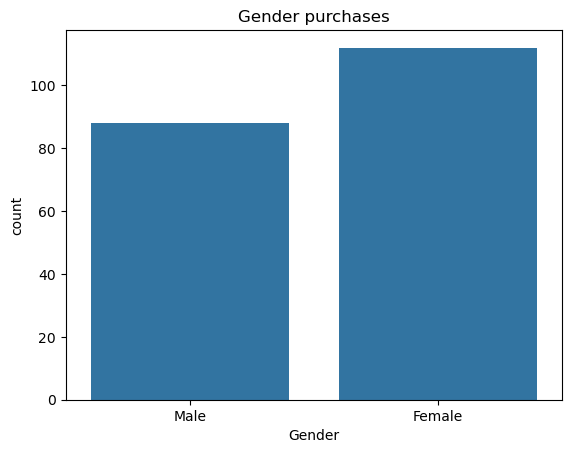

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

#GENDER DISTRIBUTION
sns.countplot(x = "Gender", data= df)
plt.title("Gender purchases")
plt.show()

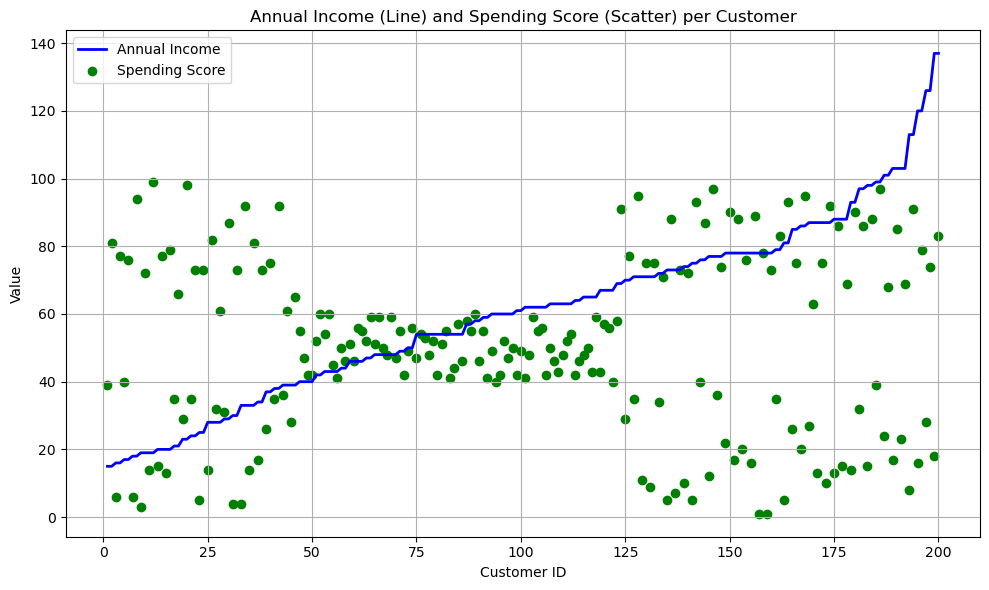

In [151]:
df = df.sort_values(by='CustomerID')

plt.figure(figsize=(10, 6))

# Line plot for Annual Income (blue)
plt.plot(df['CustomerID'], df['Annual_Income'], label='Annual Income', color='blue', linewidth=2)

# Scatter plot for Spending Score (green)
plt.scatter(df['CustomerID'], df['Spending_Score'], label='Spending Score', color='green')

# Labels and styling
plt.title("Annual Income (Line) and Spending Score (Scatter) per Customer")
plt.xlabel("Customer ID")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



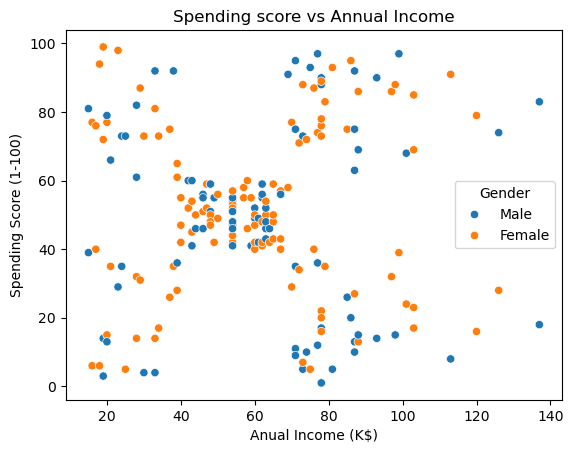

In [152]:
sns.scatterplot(data=df, x = 'Annual_Income', y = 'Spending_Score' , hue= 'Gender')
plt.title("Spending score vs Annual Income")
plt.xlabel("Anual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### 3. Data Preperation
**Goal** : Cleana nd transform data into a format suitable for modeling 

In [153]:
#DROP UNHELPFUL COLUMNS
df.drop(columns= ["CustomerID"], inplace= True)
#Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female':1})
#Check for missing values
df.isnull().sum()


Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### 4. Modeling
**Goal** : apply clustering algortithem to group customers


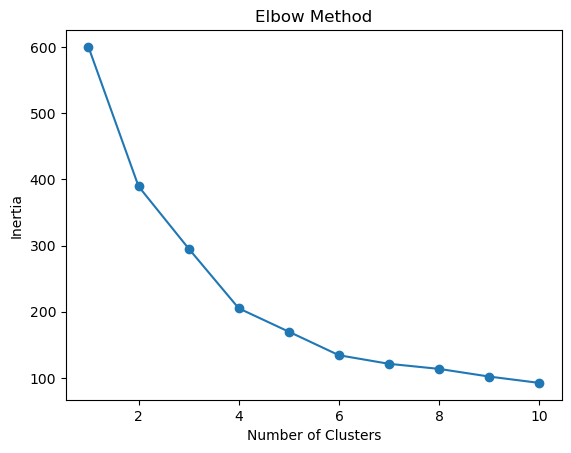

In [155]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features
features = df[['Age', 'Annual_Income', 'Spending_Score']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [161]:
kmeans = KMeans(n_clusters= 5, random_state= 42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
print(df)

     Gender  Age  Annual_Income  Spending_Score  Cluster
0         0   19             15              39        2
1         0   21             15              81        2
2         1   20             16               6        3
3         1   23             16              77        2
4         1   31             17              40        2
..      ...  ...            ...             ...      ...
195       1   35            120              79        1
196       1   45            126              28        4
197       0   32            126              74        1
198       0   32            137              18        4
199       0   30            137              83        1

[200 rows x 5 columns]


In [162]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Create a sample dataset
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)

# Train the model
sgd_regressor.fit(X_train, y_train)

# Make predictions
predictions = sgd_regressor.predict(X_test)

# Evaluate the model
score = sgd_regressor.score(X_test, y_test)  # R^2 score
print(f"R^2 score: {score}")


R^2 score: 0.9999968309814495


In [163]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_train, y_train)

SGDRegressor()

In [164]:
score = sgd_regressor.score(X_test, y_test)  # R^2 score for evaluation

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = sgd_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.022042415755077004
Mean Absolute Error: 0.12277560270532017
